In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import gc

plt.rcParams["figure.figsize"] = (20,10)
pd.options.display.precision = 12
sample_size = 150000

In [2]:
start = time.time()
nrows = 150000000
train_data = pd.read_csv('train.csv' , nrows = nrows, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})
end = time.time()
print(end - start)

35.734501123428345


In [3]:
train_data

,acoustic_data,time_to_failure
0,12,1.4690999832
1,6,1.4690999821
2,8,1.4690999810
3,5,1.4690999799
4,8,1.4690999788
...,...,...
149999995,5,9.7775995452
149999996,2,9.7775995441
149999997,5,9.7775995430
149999998,8,9.7775995419


In [4]:
train_data.head()

,acoustic_data,time_to_failure
0,12,1.4690999832
1,6,1.4690999821
2,8,1.4690999810
3,5,1.4690999799
4,8,1.4690999788


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000000 entries, 0 to 149999999
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   acoustic_data    int16  
 1   time_to_failure  float64
dtypes: float64(1), int16(1)
memory usage: 1.4 GB


In [6]:
gc.collect()

0

In [7]:
train_acoustic_data_sample = train_data['acoustic_data'][:150000]
train_time_to_failure_sample = train_data['time_to_failure'][:150000]

Text(0.5, 0, 'index')

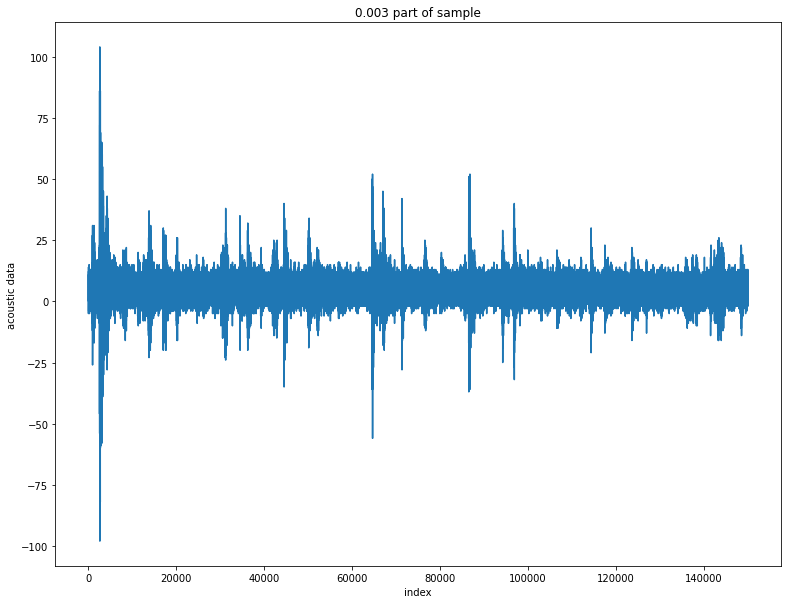

In [8]:
plt.figure(figsize=(13, 10))
plt.plot(train_acoustic_data_sample)
plt.title("%0.3f part of sample"% (150000/60000000))
plt.ylabel('acoustic data')
plt.xlabel('index')

Text(0.5, 0, 'index')

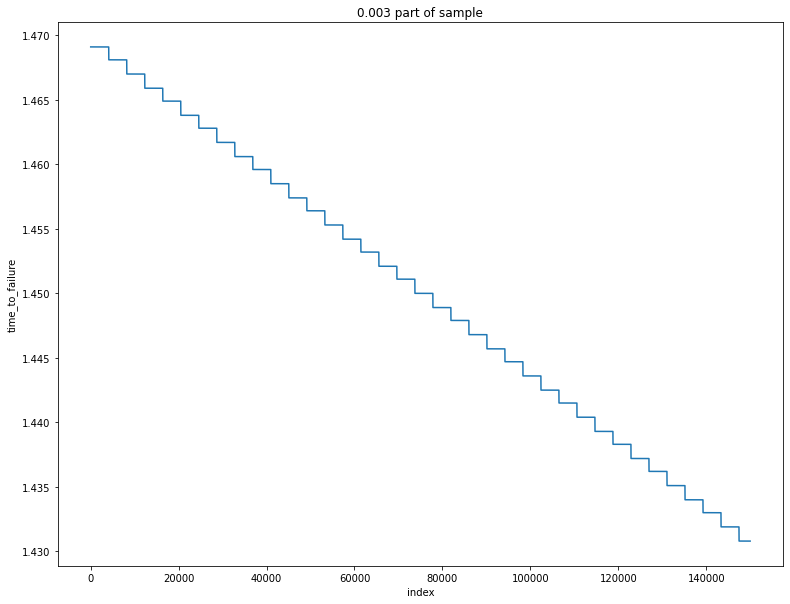

In [9]:
plt.figure(figsize=(13, 10))
plt.plot(train_time_to_failure_sample)
plt.title("%0.3f part of sample"% (150000/60000000))
plt.ylabel('time_to_failure')
plt.xlabel('index')

In [10]:
train_acoustic_data_sample_1 = train_data['acoustic_data'][:600000]
train_time_to_failure_sample_1 = train_data['time_to_failure'][:600000]

Text(0.5, 0, 'index')

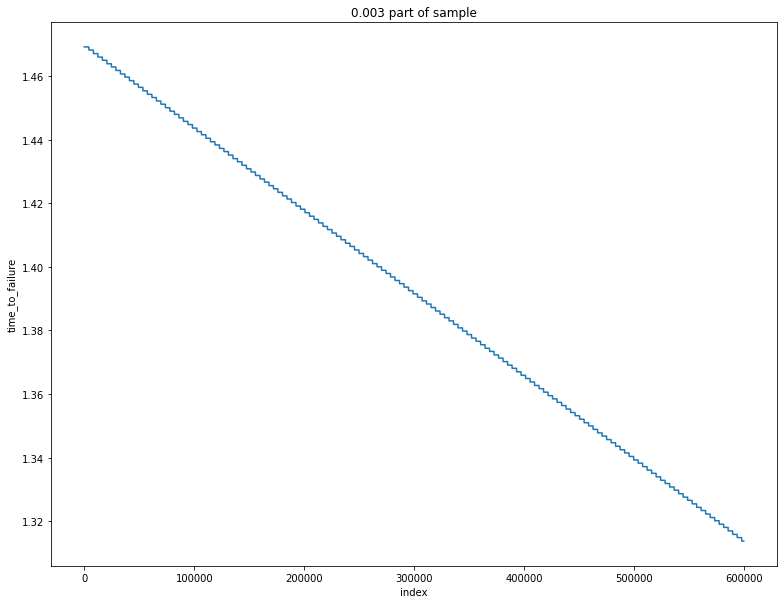

In [11]:
plt.figure(figsize=(13, 10))
plt.plot(train_time_to_failure_sample_1)
plt.title("%0.3f part of sample"% (150000/60000000))
plt.ylabel('time_to_failure')
plt.xlabel('index')

In [12]:
def plot_data(train_ad_sample_df, train_ttf_sample_df):
    fig, ax = plt.subplots(2,1, figsize=(13, 10))
    ax[0].set_title("Acoustic Data: {:.4f} % sampled data".format(float(train_ad_sample_df.shape[0]/train_data.shape[0])*100))
    ax[0].plot(train_ad_sample_df, color='red')
    ax[0].set_ylabel('acoustic data', color='red')
    ax[0].set_xlabel('index', color='red')
    ax[1].set_title("Time to Failure: {:.4f} % sampled data".format(float(train_ad_sample_df.shape[0]/train_data.shape[0])*100))
    ax[1].plot(train_ttf_sample_df, color='green')
    ax[1].set_ylabel('time to failure', color='green')
    ax[1].set_xlabel('index', color='green')

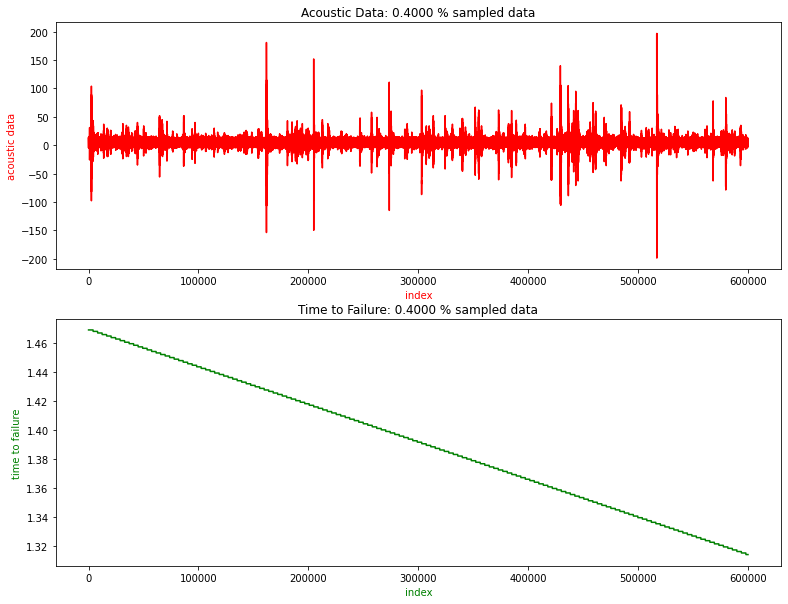

In [13]:
plot_data(train_acoustic_data_sample_1, train_time_to_failure_sample_1)
del train_acoustic_data_sample_1
del train_time_to_failure_sample_1

In [14]:
train_acoustic_data_sample_2 = train_data['acoustic_data'][:6000000]
train_time_to_failure_sample_2 = train_data['time_to_failure'][:6000000]

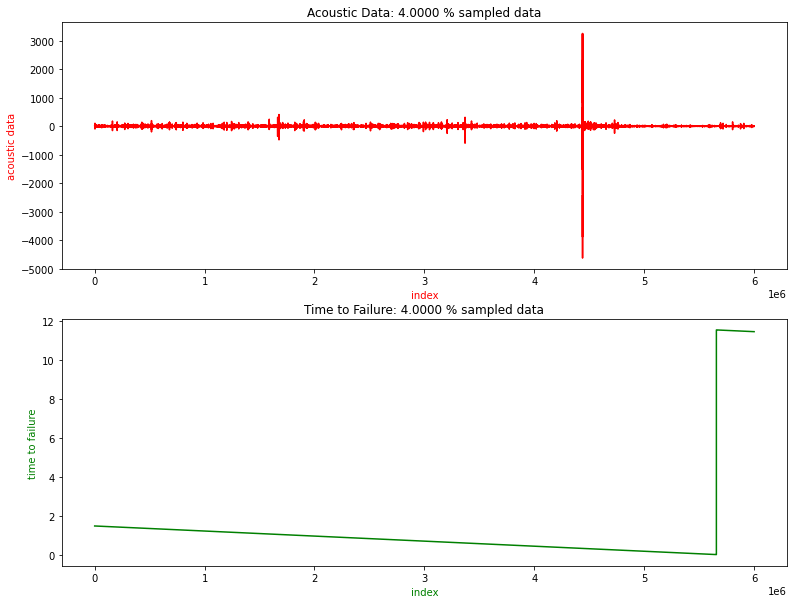

In [15]:
plot_data(train_acoustic_data_sample_2, train_time_to_failure_sample_2)
del train_acoustic_data_sample_2
del train_time_to_failure_sample_2

In [16]:
train_acoustic_data_sample_3 = train_data['acoustic_data'][:30000000]
train_time_to_failure_sample_3 = train_data['time_to_failure'][:30000000]

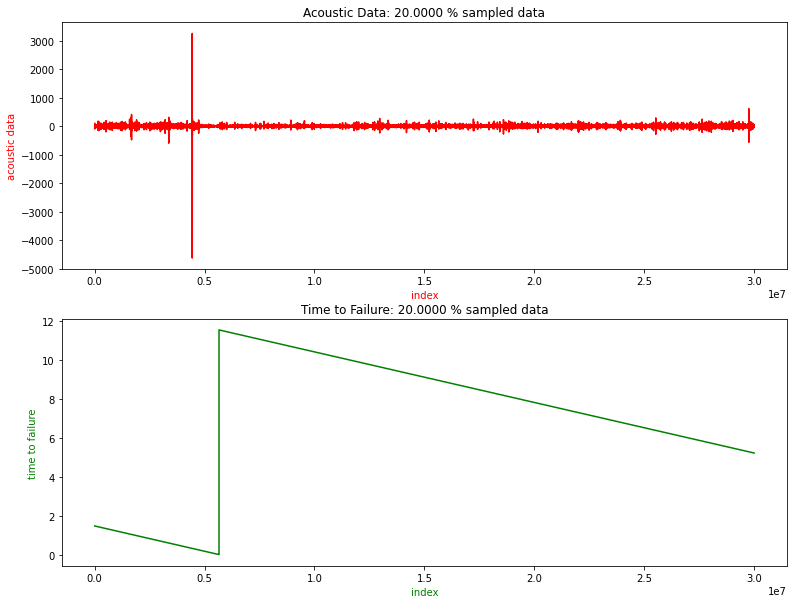

In [17]:
plot_data(train_acoustic_data_sample_3, train_time_to_failure_sample_3)
del train_acoustic_data_sample_3
del train_time_to_failure_sample_3

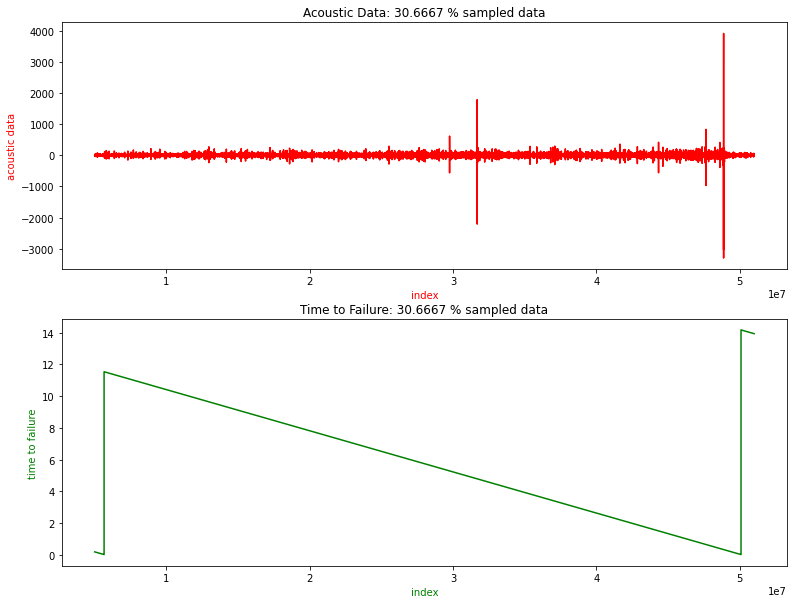

In [18]:
plot_data(train_data['acoustic_data'][5000000:51000000], train_data['time_to_failure'][5000000:51000000])


In [19]:
gc.collect()

21666

In [20]:
del train_data

In [26]:
time_to_failure = []

nrows = 100000000 
train_data = pd.read_csv("train.csv",  dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64}, iterator=True)
for i in range(0, 7):
    start = time.time()
    i_df = train_data.get_chunk(nrows)
    for j in range(0 + i*nrows, nrows + i*nrows, 10000):
        time_to_failure.append(np.float64(i_df['time_to_failure'][j]))
        if j>629000000:
            break
            
    end = time.time()
    print(end - start)
    del i_df
del train_data
gc.collect()

22.63534665107727
24.017226219177246
28.925658464431763
24.98173952102661
25.36296033859253
24.44101881980896
7.5855712890625


39

Text(0.5, 0, 'index_10000')

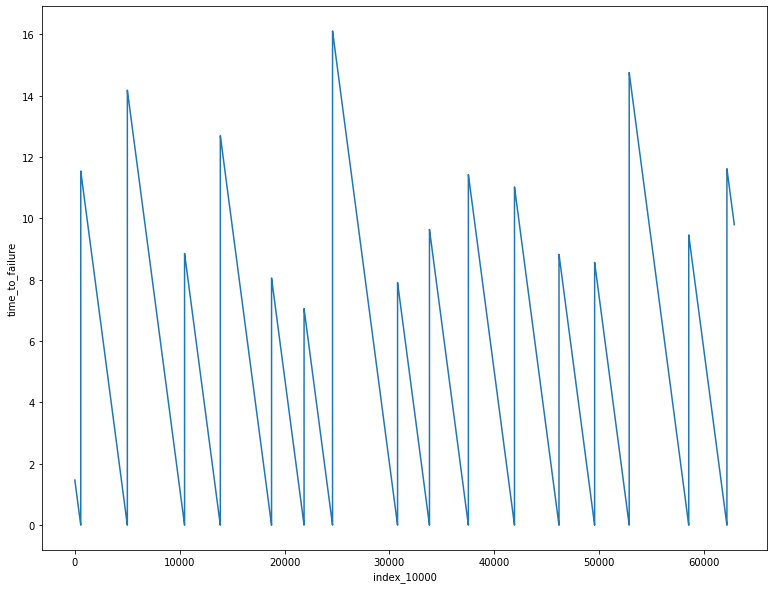

In [27]:
plt.figure(figsize=(13, 10))
plt.plot(time_to_failure)
plt.title("")
plt.ylabel('time_to_failure')
plt.xlabel('index_10000')